# Web Mining and Applied NLP (44-620)

## Final Project: Article Summarizer

### Student Name: Evan Dobler

### [GitHub](https://github.com/evandobler98)

Perform the tasks described in the Markdown cells below.  When you have completed the assignment make sure your code cells have all been run (and have output beneath them) and ensure you have committed and pushed ALL of your changes to your assignment repository.

You should bring in code from previous assignments to help you answer the questions below.

Every question that requires you to write code will have a code cell underneath it; you may either write your entire solution in that cell or write it in a python file (`.py`), then import and run the appropriate code to answer the question.

## Import Necessary Dependencies and Check


In [784]:
from collections import Counter
import pickle
import requests
import spacy
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
import numpy as np
from spacytextblob.spacytextblob import SpacyTextBlob
from textblob import TextBlob

!pip list

print('All prereqs installed.')

Package            Version
------------------ ------------
annotated-types    0.7.0
appnope            0.1.4
asttokens          3.0.0
beautifulsoup4     4.12.3
blis               1.0.1
catalogue          2.0.10
certifi            2024.8.30
charset-normalizer 3.4.0
click              8.1.7
cloudpathlib       0.20.0
comm               0.2.2
confection         0.1.5
contourpy          1.3.1
cycler             0.12.1
cymem              2.0.10
debugpy            1.8.9
decorator          5.1.1
en_core_web_sm     3.8.0
executing          2.1.0
fonttools          4.55.0
html5lib           1.1
idna               3.10
ipykernel          6.29.5
ipython            8.30.0
jedi               0.19.2
Jinja2             3.1.4
joblib             1.4.2
jupyter_client     8.6.3
jupyter_core       5.7.2
kiwisolver         1.4.7
langcodes          3.5.0
language_data      1.3.0
marisa-trie        1.2.1
markdown-it-py     3.0.0
MarkupSafe         3.0.2
matplotlib         3.9.3
matplotlib-inline  0.1.7
mdurl 

1. Find on the internet an article or blog post about a topic that interests you and you are able to get the text for using the technologies we have applied in the course.  Get the html for the article and store it in a file (which you must submit with your project)

In [785]:
# URL of the article
url = "https://www.newsweek.com/rankings/worlds-best-hospitals-2024/united-states"

# Set a user-agent header to simulate a browser request
headers = {
    'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/92.0.4515.159 Safari/537.36'
}

# Send a GET request to the webpage with headers and a timeout
try:
    response = requests.get(url, headers=headers, timeout=30)  # Timeout set to 30 seconds
    
    # Check if the request was successful (status code 200)
    if response.status_code == 200:
       
        # Get the content of the page
        page_content = response.content

        # Parse content 
        soup = BeautifulSoup(page_content, "html.parser")

        # Write HTML content to a file
        with open("article.html", "wb") as file:
            file.write(page_content)

        print("HTML content has been saved to 'article.html'")
    else:
        print(f"Failed to retrieve the webpage. Status code: {response.status_code}")
except requests.exceptions.Timeout:
    print("Request timed out. Please try again.")
except requests.exceptions.RequestException as e:
    print(f"An error occurred: {e}")


HTML content has been saved to 'article.html'


2. Read in your article's html source from the file you created in question 1 and do sentiment analysis on the article/post's text (use `.get_text()`).  Print the polarity score with an appropriate label.  Additionally print the number of sentences in the original article (with an appropriate label)

In [786]:
# Load spaCy model and add the spacytextblob pipe
nlp = spacy.load("en_core_web_sm")
nlp.add_pipe("spacytextblob")

# Set a user-agent header to simulate a browser request
url = "https://www.newsweek.com/rankings/worlds-best-hospitals-2024/united-states"
headers = {
    'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/92.0.4515.159 Safari/537.36'
}

# Fetch the webpage with the user-agent header
response = requests.get(url, headers=headers)

# Check that the request was successful
if response.status_code == 200:
    html_content = response.text
else:
    print(f"Failed to retrieve the webpage. Status code: {response.status_code}")
    html_content = ""

# Parse the HTML content 
soup = BeautifulSoup(html_content, 'html.parser')

# Extract text from article
article_text = soup.get_text(separator=' ', strip=True)

# Use spaCy to analyze the sentiment
doc = nlp(article_text)
polarity = doc._.blob.polarity

# Print polarity score
print("The overall Article polarity score is", polarity)

# Determine sentiment based on polarity
if polarity > 0:
    sentiment = "positive"
elif polarity < 0:
    sentiment = "negative"
else:
    sentiment = "neutral"

# Print the sentiment
print(f"The overall sentiment of the Article is {sentiment}.")

# Count total sentences in article
num_sentences = len(list(doc.sents))
print(f"Number of Sentences in the Article: {num_sentences}")


The overall Article polarity score is 0.09191405861897593
The overall sentiment of the Article is positive.
Number of Sentences in the Article: 102


3. Load the article text into a trained `spaCy` pipeline, and determine the 5 most frequent tokens (converted to lower case).  Print the common tokens with an appropriate label.  Additionally, print the tokens their frequencies (with appropriate labels)

In [787]:
# Load the spaCy model
nlp = spacy.load("en_core_web_sm")

# Load HTML content from the file
with open("article.html", "r", encoding="utf-8") as file:
    html_content = file.read()

# Parse HTML content 
soup = BeautifulSoup(html_content, 'html.parser')

# Extract the article text
article_text = soup.get_text(separator=' ', strip=True)

# Process the text using spaCy pipeline
doc = nlp(article_text)

# Collect tokens and convert to lowercase
tokens = [token.text.lower() for token in doc if not token.is_stop and not token.is_punct]

# Count token frequencies
token_freq = Counter(tokens)

# Print 5 most frequent tokens
print("The 5 most frequent tokens are:")
for token, freq in token_freq.most_common(5):
    print(f"Token: {token}, Frequency: {freq}")


The 5 most frequent tokens are:
Token: ✓, Frequency: 451
Token: hospital, Frequency: 237
Token: medical, Frequency: 176
Token: center, Frequency: 166
Token: hospitals, Frequency: 77


4. Load the article text into a trained `spaCy` pipeline, and determine the 5 most frequent lemmas (converted to lower case).  Print the common lemmas with an appropriate label.  Additionally, print the lemmas with their frequencies (with appropriate labels).

In [788]:
# Load the spaCy model
nlp = spacy.load("en_core_web_sm")

# Load HTML content from the file
with open("article.html", "r", encoding="utf-8") as file:
    html_content = file.read()

# Parse HTML content 
soup = BeautifulSoup(html_content, 'html.parser')

# Extract the article text
article_text = soup.get_text(separator=' ', strip=True)

# Process the text using spaCy pipeline
doc = nlp(article_text)

# Collect lemmas and convert to lowercase
lemmas = [token.lemma_.lower() for token in doc if not token.is_stop and not token.is_punct]

# Count lemma frequencies
lemma_freq = Counter(lemmas)

# Print 5 most frequent lemmas
print("The 5 most frequent lemmas are:")
for lemma, freq in lemma_freq.most_common(5):
    print(f"Lemma: {lemma}, Frequency: {freq}")


The 5 most frequent lemmas are:
Lemma: ✓, Frequency: 451
Lemma: hospital, Frequency: 269
Lemma: medical, Frequency: 176
Lemma: center, Frequency: 167
Lemma: health, Frequency: 77


5. Make a list containing the scores (using tokens) of every sentence in the article, and plot a histogram with appropriate titles and axis labels of the scores. From your histogram, what seems to be the most common range of scores (put the answer in a comment after your code)?

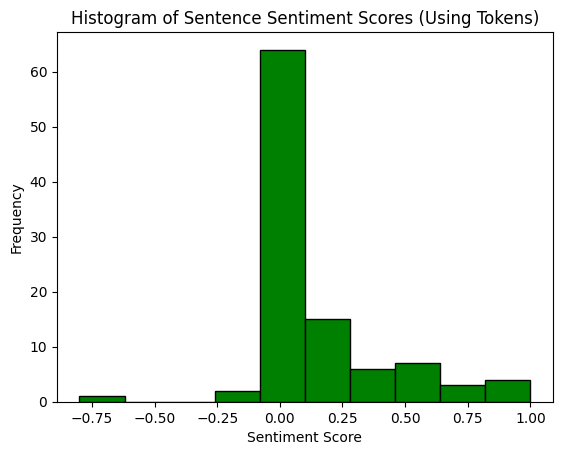

List of Sentence Sentiment Scores (Using Tokens):
Sentence 1: 0.67 | Sentence 2: 0.67 | Sentence 3: 0.56 | Sentence 4: 1.00 | Sentence 5: 0.00
Sentence 6: 0.19 | Sentence 7: 0.14 | Sentence 8: 0.14 | Sentence 9: 0.00 | Sentence 10: 0.10
Sentence 11: 0.00 | Sentence 12: 0.00 | Sentence 13: 0.07 | Sentence 14: 0.20 | Sentence 15: -0.01
Sentence 16: 0.02 | Sentence 17: -0.01 | Sentence 18: -0.05 | Sentence 19: 0.02 | Sentence 20: 0.25
Sentence 21: 0.50 | Sentence 22: 0.00 | Sentence 23: 0.33 | Sentence 24: 0.00 | Sentence 25: 0.00
Sentence 26: 1.00 | Sentence 27: 0.00 | Sentence 28: -0.10 | Sentence 29: 0.00 | Sentence 30: 0.07
Sentence 31: -0.02 | Sentence 32: 1.00 | Sentence 33: 0.00 | Sentence 34: 0.00 | Sentence 35: 0.14
Sentence 36: 0.00 | Sentence 37: 0.00 | Sentence 38: 0.00 | Sentence 39: 0.00 | Sentence 40: 0.24
Sentence 41: 0.60 | Sentence 42: 0.40 | Sentence 43: -0.17 | Sentence 44: 0.03 | Sentence 45: 0.00
Sentence 46: 0.25 | Sentence 47: 0.00 | Sentence 48: 0.00 | Sentence 49

In [789]:
# Load spaCy model and add spacytextblob pipeline
nlp = spacy.load("en_core_web_sm")
nlp.add_pipe("spacytextblob")

# Load HTML content 
with open("article.html", "r", encoding="utf-8") as file:
    html_content = file.read()

# Parse HTML content
soup = BeautifulSoup(html_content, 'html.parser')

# Extract the article text
article_text = soup.get_text(separator=' ', strip=True)

# Process the article text with spaCy pipeline
doc = nlp(article_text)

# Calculate sentiment score for each sentence based on tokens
sentence_token_scores = []
for sent in doc.sents:
    
    # Reconstruct the sentence using tokens
    token_text = " ".join([token.text for token in sent])
    
    # Use the spacytextblob sentiment polarity for the reconstructed sentence
    token_doc = nlp(token_text)
    sentence_token_scores.append(token_doc._.blob.polarity)

# Plot a histogram of the sentiment scores
plt.hist(sentence_token_scores, bins=10, color='green', edgecolor='black')
plt.title("Histogram of Sentence Sentiment Scores (Using Tokens)")
plt.xlabel("Sentiment Score")
plt.ylabel("Frequency")
plt.show()

# Print the token-based sentence scores 
print("List of Sentence Sentiment Scores (Using Tokens):")
for i in range(0, len(sentence_token_scores), 5):
    
    # Grab the next five scores (or fewer if at the end)
    group = sentence_token_scores[i:i+5]
   
    # Format and print them
    print(" | ".join(f"Sentence {i+j+1}: {score:.2f}" for j, score in enumerate(group)))

print("")
print(f"Number of Scores: {len(sentence_token_scores)}")

#### Part 2: Comment on the most common range of scores
The most common range of scores appears to be around neutral (0 to 0.2), indicating most sentences in the article have slightly positive or neutral sentiment.

6. Make a list containing the scores (using lemmas) of every sentence in the article, and plot a histogram with appropriate titles and axis labels of the scores.  From your histogram, what seems to be the most common range of scores (put the answer in a comment after your code)?

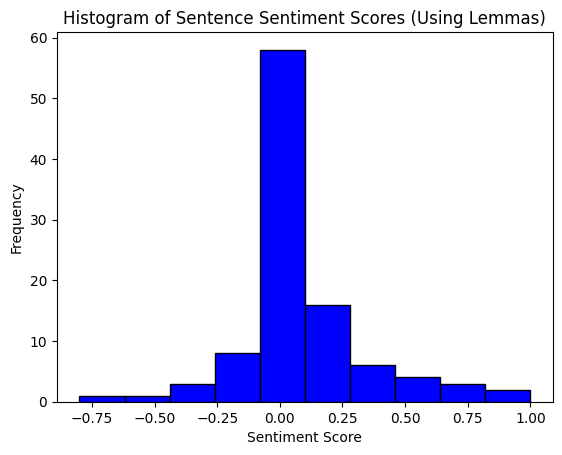

List of Sentence Sentiment Scores (Using Lemmas):
Sentence 1: 0.67, Sentence 2: 0.67, Sentence 3: 0.41, Sentence 4: 0.70, Sentence 5: 0.00
Sentence 6: 0.19, Sentence 7: 0.14, Sentence 8: -0.05, Sentence 9: 0.10, Sentence 10: 0.07
Sentence 11: 0.00, Sentence 12: 0.00, Sentence 13: 0.07, Sentence 14: 0.20, Sentence 15: -0.01
Sentence 16: 0.02, Sentence 17: -0.01, Sentence 18: -0.05, Sentence 19: 0.02, Sentence 20: 0.25
Sentence 21: 0.50, Sentence 22: 0.00, Sentence 23: 0.33, Sentence 24: 0.00, Sentence 25: 0.00
Sentence 26: 0.10, Sentence 27: 0.00, Sentence 28: -0.10, Sentence 29: 0.00, Sentence 30: 0.07
Sentence 31: -0.12, Sentence 32: 0.85, Sentence 33: -0.20, Sentence 34: 0.00, Sentence 35: 0.14
Sentence 36: 0.00, Sentence 37: 0.00, Sentence 38: 0.00, Sentence 39: -0.23, Sentence 40: 0.24
Sentence 41: 0.60, Sentence 42: 0.40, Sentence 43: -0.17, Sentence 44: 0.03, Sentence 45: 0.00
Sentence 46: 0.25, Sentence 47: 0.00, Sentence 48: 0.00, Sentence 49: 1.00, Sentence 50: 0.00
Sentence 5

In [790]:
# Load spaCy model and add spacytextblob pipeline
nlp = spacy.load("en_core_web_sm")
nlp.add_pipe("spacytextblob")

# Load the HTML content from the file
with open("article.html", "r", encoding="utf-8") as file:
    html_content = file.read()

# Parse HTML content 
soup = BeautifulSoup(html_content, 'html.parser')

# Extract the article text
article_text = soup.get_text(separator=' ', strip=True)

# Process the article text with spaCy pipeline
doc = nlp(article_text)

# Calculate sentiment score for each sentence based on lemmas
sentence_lemma_scores = []
for sent in doc.sents:
   
    # Use lemmas to calculate polarity by reconstructing the sentence
    lemma_text = " ".join([token.lemma_ for token in sent])
    lemma_doc = nlp(lemma_text)
    sentence_lemma_scores.append(lemma_doc._.blob.polarity)

# Plot a histogram of the sentiment scores
plt.hist(sentence_lemma_scores, bins=10, color='blue', edgecolor='black')
plt.title("Histogram of Sentence Sentiment Scores (Using Lemmas)")
plt.xlabel("Sentiment Score")
plt.ylabel("Frequency")
plt.show()

# Print the list of sentence sentiment scores, 5 scores per line
print("List of Sentence Sentiment Scores (Using Lemmas):")
for i in range(0, len(sentence_lemma_scores), 5):
    
    # Print 5 scores per line
    print(", ".join([f"Sentence {j+1}: {sentence_lemma_scores[j]:.2f}" for j in range(i, min(i+5, len(sentence_lemma_scores)))]))

print("")
print(f"Number of Scores: {len(sentence_lemma_scores)}")    



#### Part 2: Comment on the most common range of scores
The most common range of scores appears to be around neutral (-0.1 to 0.2), indicating most sentences in the article have slightly positive or neutral sentiment.

7. Using the histograms from questions 5 and 6, decide a "cutoff" score for tokens and lemmas such that fewer than half the sentences would have a score greater than the cutoff score.  Record the scores in this Markdown cell

* Cutoff Score (tokens): 0.0
* Cutoff Score (lemmas): 0.0

In [791]:
# Load spaCy model and add spacytextblob pipeline
nlp = spacy.load("en_core_web_sm")
nlp.add_pipe("spacytextblob")

# Load the HTML content from the file
with open("article.html", "r", encoding="utf-8") as file:
    html_content = file.read()

# Parse HTML content 
soup = BeautifulSoup(html_content, 'html.parser')

# Extract the article text
article_text = soup.get_text(separator=' ', strip=True)

# Process the article text with spaCy pipeline
doc = nlp(article_text)

# Calculate sentiment score for each sentence based on lemmas
sentence_lemma_scores = []
for sent in doc.sents:
    
    # Use lemmas to calculate polarity by reconstructing the sentence
    lemma_text = " ".join([token.lemma_ for token in sent])
    lemma_doc = nlp(lemma_text)
    sentence_lemma_scores.append(lemma_doc._.blob.polarity)

# Calculate sentiment score for each sentence based on tokens
sentence_token_scores = []
for sent in doc.sents:
   
    # Use the original tokens to calculate polarity
    token_text = " ".join([token.text for token in sent])
    token_doc = nlp(token_text)
    sentence_token_scores.append(token_doc._.blob.polarity)

# Determine a cutoff score 
sorted_lemma_scores = sorted(sentence_lemma_scores)
sorted_token_scores = sorted(sentence_token_scores)

# For Lemmas
cutoff_lemma = sorted_lemma_scores[len(sorted_lemma_scores) // 2]

# For Tokens
cutoff_token = sorted_token_scores[len(sorted_token_scores) // 2]

# Print the cutoff scores
print(f"Cutoff Score (lemmas): {cutoff_lemma:.2f}")
print(f"Cutoff Score (tokens): {cutoff_token:.2f}")


Cutoff Score (lemmas): 0.00
Cutoff Score (tokens): 0.00


8. Create a summary of the article by going through every sentence in the article and adding it to an (initially) empty list if its score (based on tokens) is greater than the cutoff score you identified in question 8.  If your loop variable is named `sent`, you may find it easier to add `sent.text.strip()` to your list of sentences.  Print the summary (I would cleanly generate the summary text by `join`ing the strings in your list together with a space (`' '.join(sentence_list)`).

In [792]:
# Load spaCy model and add spacytextblob pipeline
nlp = spacy.load("en_core_web_sm")
nlp.add_pipe("spacytextblob")

# Load the HTML content from the file
with open("article.html", "r", encoding="utf-8") as file:
    html_content = file.read()

# Parse HTML content
soup = BeautifulSoup(html_content, 'html.parser')

# Extract the article text
article_text = soup.get_text(separator=' ', strip=True)

# Process the article text with spaCy pipeline
doc = nlp(article_text)

# Calculate sentiment score for each sentence based on tokens
sentence_token_scores = []
for sent in doc.sents:
    sentence_token_scores.append(sent._.blob.polarity)

# Define the cutoff score
cutoff_score = 0.00  

# Create a list of sentences whose scores are greater than the cutoff score
sentence_list = []
for sent, score in zip(doc.sents, sentence_token_scores):
    if score > cutoff_score:
        sentence_list.append(sent.text.strip())

# Limit summary to 6 sentences
sentence_list = sentence_list[:6] 

# Generate and print the summary
summary = ' '.join(sentence_list)
print("Summary:")
print(summary)


Summary:
United States World's Best Hospitals 2024 - Newsweek Rankings U.S. World Science Health Life Rankings Opinion Entertainment Fact Check My Turn Education Events Sports Podcasts Better Planet Better Workplaces Vault Mightier Autos Newsletters Unconventional Vantage Experts Voices Subscribe for $1 Login × Subscribe for $1 Login U.S. World Science Health Life Rankings Opinion Entertainment Fact Check My Turn Education Events Sports Podcasts Better Planet Better Workplaces Vault Mightier Autos Newsletters Unconventional Vantage Experts Voices United States World's Best Hospitals 2024 Home > Rankings Portal Share Share on Facebook Share on Twitter Share on LinkedIn Share on Reddit Share on Flipboard Share via Email Comments World's Best Hospitals 2024 There aren't many decisions more important than choosing the right hospital to provide care for yourself or a loved one. To help, Newsweek has partnered with Statista for its annual ranking of the world's best hospitals, a series that 

9. Print the polarity score of your summary you generated with the token scores (with an appropriate label). Additionally, print the number of sentences in the summarized article.

In [793]:
# Load spaCy model and add spacytextblob pipeline
nlp = spacy.load("en_core_web_sm")
nlp.add_pipe("spacytextblob")

# Load the HTML content from the file
with open("article.html", "r", encoding="utf-8") as file:
    html_content = file.read()

# Parse HTML content 
soup = BeautifulSoup(html_content, 'html.parser')

# Extract the article text
article_text = soup.get_text(separator=' ', strip=True)

# Process the article text with spaCy pipeline
doc = nlp(article_text)

# Calculate sentiment score for each sentence based on tokens
sentence_token_scores = []
for sent in doc.sents:
    sentence_token_scores.append(sent._.blob.polarity)

# Define the cutoff score 
cutoff_score = 0.00 

# Create a list of sentences whose scores are greater than the cutoff score
sentence_list = []
for sent, score in zip(doc.sents, sentence_token_scores):
    if score > cutoff_score:
        sentence_list.append(sent.text.strip())

# Limit the summary to no more than 6 sentences
sentence_list = sentence_list[:6]

# Generate the summary text
summary = ' '.join(sentence_list)

# Calculate the polarity score of the summary
summary_doc = nlp(summary)
summary_polarity = summary_doc._.blob.polarity

# Print polarity score and number of sentences
print(f"Polarity Score of Article Summary (Token): {summary_polarity:.2f}")
print(f"Number of Sentences in the Summary: {len(sentence_list)}")



Polarity Score of Article Summary (Token): 0.45
Number of Sentences in the Summary: 6


10. Create a summary of the article by going through every sentence in the article and adding it to an (initially) empty list if its score (based on lemmas) is greater than the cutoff score you identified in question 8.  If your loop variable is named `sent`, you may find it easier to add `sent.text.strip()` to your list of sentences.  Print the summary (I would cleanly generate the summary text by `join`ing the strings in your list together with a space (`' '.join(sentence_list)`).

In [794]:
# Load spaCy model and add spacytextblob pipeline
nlp = spacy.load("en_core_web_sm")
nlp.add_pipe("spacytextblob")

# Load the HTML content from the file
with open("article.html", "r", encoding="utf-8") as file:
    html_content = file.read()

# Parse HTML content 
soup = BeautifulSoup(html_content, 'html.parser')

# Extract the article text
article_text = soup.get_text(separator=' ', strip=True)

# Process the article text with spaCy pipeline
doc = nlp(article_text)

# Calculate sentiment score for each sentence based on lemmas
sentence_lemma_scores = []
for sent in doc.sents:
    lemma_text = " ".join([token.lemma_ for token in sent])
    lemma_doc = nlp(lemma_text)
    sentence_lemma_scores.append(lemma_doc._.blob.polarity)

# Define the cutoff score for lemmas
cutoff_score = 0.00  

# Create a list of sentences whose lemma scores are greater than the cutoff score
sentence_list = []
for sent, score in zip(doc.sents, sentence_lemma_scores):
    if score > cutoff_score:
        sentence_list.append(sent.text.strip())

# Format the summary
formatted_summary = "\n".join(
    [f"Sentence {i + 1}: {sentence}" for i, sentence in enumerate(sentence_list)]
)

# Print summary
print("Summary:")
print(formatted_summary)


Summary:
Sentence 1: United States World's Best Hospitals 2024 - Newsweek Rankings U.S. World Science Health Life Rankings Opinion Entertainment Fact Check My Turn Education Events Sports Podcasts Better Planet Better Workplaces Vault Mightier Autos Newsletters Unconventional Vantage Experts Voices Subscribe for $1 Login × Subscribe for $1 Login U.S. World Science Health Life
Sentence 2: Rankings Opinion Entertainment Fact Check My Turn Education Events Sports Podcasts Better Planet Better Workplaces Vault Mightier Autos Newsletters Unconventional Vantage Experts Voices United States World's Best Hospitals 2024 Home >
Sentence 3: Rankings Portal Share Share on Facebook Share on Twitter Share on LinkedIn Share on Reddit Share on Flipboard Share via Email Comments World's Best Hospitals 2024 There aren't many decisions more important than choosing the right hospital to provide care for yourself or a loved one.
Sentence 4: To help, Newsweek has partnered with Statista for its annual ranki

11. Print the polarity score of your summary you generated with the lemma scores (with an appropriate label). Additionally, print the number of sentences in the summarized article.

In [795]:
# Load spaCy model and add spacytextblob pipeline
nlp = spacy.load("en_core_web_sm")
nlp.add_pipe("spacytextblob")

# Load the HTML content from the file
with open("article.html", "r", encoding="utf-8") as file:
    html_content = file.read()

# Parse HTML content 
soup = BeautifulSoup(html_content, 'html.parser')

# Extract the article text
article_text = soup.get_text(separator=' ', strip=True)

# Process the article text with spaCy pipeline
doc = nlp(article_text)

# Calculate sentiment score for each sentence based on lemmas
sentence_lemma_scores = []
for sent in doc.sents:
    lemma_text = " ".join([token.lemma_ for token in sent])
    lemma_doc = nlp(lemma_text)
    sentence_lemma_scores.append(lemma_doc._.blob.polarity)

# Define the cutoff score for lemmas
cutoff_score = 0.00  

# Create a list of sentences whose lemma scores are greater than the cutoff score
sentence_list = []
for sent, score in zip(doc.sents, sentence_lemma_scores):
    if score > cutoff_score:
        sentence_list.append(sent.text.strip())

# Generate summary
summary = " ".join(sentence_list)

# Calculate summary polarity score
summary_doc = nlp(summary)
summary_polarity = summary_doc._.blob.polarity

# Print the polarity score and number of sentences
print(f"Polarity Score of Article Summary (Lemma): {summary_polarity:.2f}")
print(f"Number of Sentences in the Summary: {len(sentence_list)}")


Polarity Score of Article Summary (Lemma): 0.17
Number of Sentences in the Summary: 39


12.  Compare your polarity scores of your summaries to the polarity scores of the initial article.  Is there a difference?  Why do you think that may or may not be?.  Answer in this Markdown cell.  

|**Item**     |**Polarity Score**|**Number of Sentences**|**Positive or Negative Sentiment**|
|-------------|:----------------:|:---------------------:|:----------------------:|
|Full Article |       0.09       |         102           |       Positive         |
|Token Summary|       0.45       |          6            |       Positive         |
|Lemma Summary|       0.17       |          39           |       Positive         |

There are a few differences to note, when comparing the polarity scores. The full article has 102 sentences total, while the summaries have 45 combined sentences. In regards to the polarity scores, they are mainly neutral, with a positive sentiment. The more sentences that are analyzed, the closer the polarity score is to 0. The full article has 102 sentences with a score very close to 0. The lemma summary has 39 sentences with a score of 0.17, and the token summary has only 6 sentences with the most positive score of 0.45. 

13. Based on your reading of the original article, which summary do you think is better (if there's a difference).  Why do you think this might be?

Based on my reading of the article, there isn't much of a difference between all three of the items. They are all mainly neutral, as the full article was mainly factual and didn't show opinions one way or another. Due to the lack of opinions, that is why this article is very neutral and not leaning any way. 